<a href="https://colab.research.google.com/github/srosamont/Projects_Ironhack/blob/master/NYC_ride_fare_modelling.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
sns.set_style('dark')

In [3]:
# Lire fichier
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [4]:
path="/content/drive/My Drive/Data/train_2014Clean2.csv"

In [5]:
%%time

df=pd.read_csv(path)


CPU times: user 28.1 s, sys: 4.28 s, total: 32.4 s
Wall time: 40.1 s


In [5]:
df.shape

(8021407, 18)

In [ ]:
%%time
#to Pickle
import pickle
filename = 'fichier2014lu.sav'
pickle.dump(df_2014, open(filename, 'wb'))



In [ ]:
#Unpickle
import pickle
df_2014=pickle.load( open('fichier2014lu.sav', "rb" ) )

In [ ]:
#df=pd.to_csv('/content/drive/My Drive/Data/train_2014model.csv')

CPU times: user 50.3 s, sys: 732 ms, total: 51 s
Wall time: 51 s


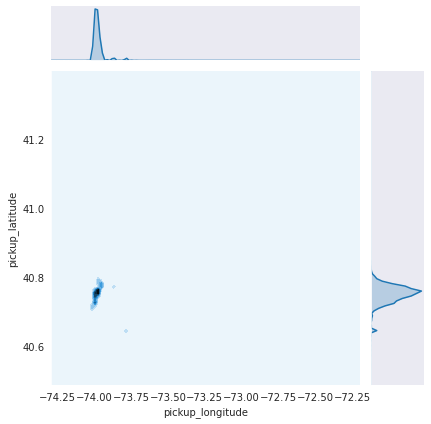

In [7]:
%%time
df_sample=df.sample(frac=0.01)
sns.jointplot(x='pickup_longitude',y='pickup_latitude',data=df_sample,kind='kde')

In [12]:
(df.pickup_latitude.max()-df.pickup_latitude.min()),(df.pickup_longitude.max()-df.pickup_longitude.min())

(2.813713, 3.8534719999999965)

In [14]:
(df.dropoff_latitude.max()-df.dropoff_latitude.min()),(df.dropoff_longitude.max()-df.dropoff_longitude.min())

(2.4977739999999926, 3.559633999999974)

In [53]:
#df['pick_lat_binned'],bins=pd.cut(x=df.pickup_latitude,bins=140,retbins=True)

In [28]:
#df.head()

,Unnamed: 0,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,date,month,week_nb,weekday,day_nb,hour,Month_day,distance_KM,working_days,pick_lat_binned
0,0,2014-02-19 07:22:00.00000074,12.5,2014-02-19 07:22:00 UTC,-73.986430,40.760465,-73.988990,40.737075,1,2014-02-19 07:22:00+00:00,February,8,Wednesday,50,7,19,2.609774,1,"(40.76, 40.77]"
1,1,2014-12-06 20:36:22.0000008,4.0,2014-12-06 20:36:22 UTC,-73.979815,40.751902,-73.979446,40.755481,1,2014-12-06 20:36:22+00:00,December,49,Saturday,340,20,6,0.399179,0,"(40.75, 40.76]"
2,2,2014-02-19 16:03:00.000000160,5.5,2014-02-19 16:03:00 UTC,-73.976075,40.752422,-73.981082,40.759285,1,2014-02-19 16:03:00+00:00,February,8,Wednesday,50,16,19,0.871913,1,"(40.75, 40.76]"
3,3,2014-07-16 10:57:00.00000069,5.0,2014-07-16 10:57:00 UTC,-73.996148,40.741890,-73.992202,40.739425,6,2014-07-16 10:57:00+00:00,July,29,Wednesday,197,10,16,0.430871,1,"(40.74, 40.75]"
4,4,2014-05-01 09:12:00.000000198,7.0,2014-05-01 09:12:00 UTC,-73.966203,40.767500,-73.980915,40.774240,6,2014-05-01 09:12:00+00:00,May,18,Thursday,121,9,1,1.447958,1,"(40.76, 40.77]"


In [54]:
#df['drop_lat_binned'],binsdrop=pd.cut(x=df.dropoff_latitude,bins=bins,retbins=True)

In [55]:
#df['pick_long_binned'],bins2=pd.cut(x=df.pickup_longitude,bins=192,retbins=True)

In [56]:
#df['drop_long_binned'],binsdrop2=pd.cut(x=df.dropoff_longitude,bins=bins2,retbins=True)

In [57]:
df.head()

,Unnamed: 0,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,date,month,week_nb,weekday,day_nb,hour,Month_day,distance_KM,working_days,pick_lat_binned,drop_lat_binned,pick_long_binned,drop_long_binned,pickup_position_bin,dropoff_position_bin
0,0,2014-02-19 07:22:00.00000074,12.5,2014-02-19 07:22:00 UTC,-73.986430,40.760465,-73.988990,40.737075,1,2014-02-19 07:22:00+00:00,February,8,Wednesday,50,7,19,2.609774,1,"(40.746, 40.766]","(40.726, 40.746]","(-73.987, -73.967]","(-74.007, -73.987]","(40.76, 40.77](-73.992, -73.982]","(40.73, 40.74](-73.992, -73.982]"
1,1,2014-12-06 20:36:22.0000008,4.0,2014-12-06 20:36:22 UTC,-73.979815,40.751902,-73.979446,40.755481,1,2014-12-06 20:36:22+00:00,December,49,Saturday,340,20,6,0.399179,0,"(40.746, 40.766]","(40.746, 40.766]","(-73.987, -73.967]","(-73.987, -73.967]","(40.75, 40.76](-73.982, -73.972]","(40.75, 40.76](-73.982, -73.972]"
2,2,2014-02-19 16:03:00.000000160,5.5,2014-02-19 16:03:00 UTC,-73.976075,40.752422,-73.981082,40.759285,1,2014-02-19 16:03:00+00:00,February,8,Wednesday,50,16,19,0.871913,1,"(40.746, 40.766]","(40.746, 40.766]","(-73.987, -73.967]","(-73.987, -73.967]","(40.75, 40.76](-73.982, -73.972]","(40.75, 40.76](-73.982, -73.972]"
3,3,2014-07-16 10:57:00.00000069,5.0,2014-07-16 10:57:00 UTC,-73.996148,40.741890,-73.992202,40.739425,6,2014-07-16 10:57:00+00:00,July,29,Wednesday,197,10,16,0.430871,1,"(40.726, 40.746]","(40.726, 40.746]","(-74.007, -73.987]","(-74.007, -73.987]","(40.74, 40.75](-74.002, -73.992]","(40.73, 40.74](-74.002, -73.992]"
4,4,2014-05-01 09:12:00.000000198,7.0,2014-05-01 09:12:00 UTC,-73.966203,40.767500,-73.980915,40.774240,6,2014-05-01 09:12:00+00:00,May,18,Thursday,121,9,1,1.447958,1,"(40.766, 40.786]","(40.766, 40.786]","(-73.967, -73.947]","(-73.987, -73.967]","(40.76, 40.77](-73.972, -73.962]","(40.77, 40.78](-73.982, -73.972]"


In [58]:
#df['pickup_position_bin']=df.pick_lat_binned.astype(str)+df.pick_long_binned.astype(str)

In [7]:
#df['pickup_position_bin'].value_counts()

In [60]:
#df['dropoff_position_bin']=df.drop_lat_binned.astype(str)+df.drop_long_binned.astype(str)

In [6]:
#df['dropoff_position_bin'].value_counts()

In [8]:
df['drop_lat_qcut'],binsq=pd.qcut(x=df.dropoff_latitude,q=20,retbins=True)


In [9]:
df['drop_long_qcut'],binsq2=pd.qcut(x=df.dropoff_longitude,q=20,retbins=True)

In [10]:
df['pick_lat_qcut'],binsq3=pd.qcut(x=df.pickup_latitude,q=20,retbins=True)

In [11]:
df['pick_long_qcut'],binsq4=pd.qcut(x=df.pickup_longitude,q=20,retbins=True)

In [14]:
df['dropoff_position_qcut']=df.drop_lat_qcut.astype(str)+df.drop_long_qcut.astype(str)

In [15]:
df['pickup_position_qcut']=df.pick_lat_qcut.astype(str)+df.pick_long_qcut.astype(str)

In [16]:
df.head()

,Unnamed: 0,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,date,month,week_nb,weekday,day_nb,hour,Month_day,distance_KM,working_days,drop_lat_qcut,drop_long_qcut,pick_lat_qcut,pick_long_qcut,dropoff_position_qcut,pickup_position_qcut
0,0,2014-02-19 07:22:00.00000074,12.5,2014-02-19 07:22:00 UTC,-73.986430,40.760465,-73.988990,40.737075,1,2014-02-19 07:22:00+00:00,February,8,Wednesday,50,7,19,2.609774,1,"(40.735, 40.74]","(-73.99, -73.987]","(40.759, 40.762]","(-73.988, -73.986]","(40.735, 40.74](-73.99, -73.987]","(40.759, 40.762](-73.988, -73.986]"
1,1,2014-12-06 20:36:22.0000008,4.0,2014-12-06 20:36:22 UTC,-73.979815,40.751902,-73.979446,40.755481,1,2014-12-06 20:36:22+00:00,December,49,Saturday,340,20,6,0.399179,0,"(40.754, 40.757]","(-73.98, -73.978]","(40.75, 40.753]","(-73.98, -73.978]","(40.754, 40.757](-73.98, -73.978]","(40.75, 40.753](-73.98, -73.978]"
2,2,2014-02-19 16:03:00.000000160,5.5,2014-02-19 16:03:00 UTC,-73.976075,40.752422,-73.981082,40.759285,1,2014-02-19 16:03:00+00:00,February,8,Wednesday,50,16,19,0.871913,1,"(40.757, 40.759]","(-73.982, -73.98]","(40.75, 40.753]","(-73.978, -73.975]","(40.757, 40.759](-73.982, -73.98]","(40.75, 40.753](-73.978, -73.975]"
3,3,2014-07-16 10:57:00.00000069,5.0,2014-07-16 10:57:00 UTC,-73.996148,40.741890,-73.992202,40.739425,6,2014-07-16 10:57:00+00:00,July,29,Wednesday,197,10,16,0.430871,1,"(40.735, 40.74]","(-73.994, -73.992]","(40.74, 40.744]","(-73.999, -73.995]","(40.735, 40.74](-73.994, -73.992]","(40.74, 40.744](-73.999, -73.995]"
4,4,2014-05-01 09:12:00.000000198,7.0,2014-05-01 09:12:00 UTC,-73.966203,40.767500,-73.980915,40.774240,6,2014-05-01 09:12:00+00:00,May,18,Thursday,121,9,1,1.447958,1,"(40.773, 40.777]","(-73.982, -73.98]","(40.767, 40.771]","(-73.968, -73.964]","(40.773, 40.777](-73.982, -73.98]","(40.767, 40.771](-73.968, -73.964]"


In [17]:
#Manhattan distance.
"""60

Euclidean: Take the square root of the sum of the squares of the differences of the coordinates.

For example, if 𝑥=(𝑎,𝑏) and 𝑦=(𝑐,𝑑), the Euclidean distance between 𝑥 and 𝑦 is

square_root((𝑎−𝑐)^2+(𝑏−𝑑)^2.

Manhattan: Take the sum of the absolute values of the differences of the coordinates.

For example, if 𝑥=(𝑎,𝑏) and 𝑦=(𝑐,𝑑), the Manhattan distance between 𝑥 and 𝑦 is

|𝑎−𝑐|+|𝑏−𝑑|.

F"""
#Step 1 - Calculate the difference in degrees longitude and latitude between pickup & dropoff.
# Given a dataframe, add two new features 'abs_diff_longitude' and
# 'abs_diff_latitude' reprensenting the vector from
# the pickup location to the dropoff location. (difference between )


def TravelVectors(df):
    df['abs_diff_longitude'] = (df.dropoff_longitude - df.pickup_longitude).abs()
    df['abs_diff_latitude'] = (df.dropoff_latitude - df.pickup_latitude).abs()
    

TravelVectors(df)

In [18]:
#Step 2 - Translate these values into distances (km)
#1 degree of Latitude is equal to 69 miles=111,044736 km
#Longitude vs miles varies depending where we are in the world.
#At the latitude of Manhattan, 1 degree of longitude is equal to approximately 50 miles=80,4672 km

### Converting abs_diff_longitude & lattitude to km...
# Since we are calculating this at New York, we can assign a constant, rather than using a formula
# longitude = degrees of latitude in radians * 111,044736
#1 degree of longitude = 80,4672 km
def convert_km(f):
      df['abs_diff_longitude_km'] = df.abs_diff_longitude*80.4672
      df['abs_diff_latitude_km'] = df.abs_diff_latitude*111.044736
convert_km(df)

In [19]:
#Step 3 - Use trigonometry to correct our distances

### Angle difference between north, and manhattan roadways
meas_ang = 0.506 # 29 degrees = 0.506 radians
import math

##This could be dealt with via a bounding box...

## adding extra features
def add_extra_manh_features(df):
    df['Euclidean'] = (df.abs_diff_latitude_km**2 + df.abs_diff_longitude_km**2)**0.5 ### as the crow flies  
    df['delta_manh_long'] = (df.Euclidean*np.sin(np.arctan(df.abs_diff_longitude_km / df.abs_diff_latitude_km)-meas_ang)).abs()
    df['delta_manh_lat'] = (df.Euclidean*np.cos(np.arctan(df.abs_diff_longitude_km / df.abs_diff_latitude_km)-meas_ang)).abs()
    df['manh_length'] = df.delta_manh_long + df.delta_manh_lat
    df['Euc_error'] = (df['manh_length'] - df['Euclidean'])*100 /  df['Euclidean']

add_extra_manh_features(df)

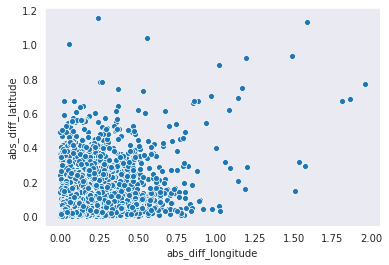

In [20]:
sns.scatterplot(data=df,x='abs_diff_longitude',y='abs_diff_latitude')

In [16]:
df.columns

Index(['Unnamed: 0', 'key', 'fare_amount', 'pickup_datetime',
       'pickup_longitude', 'pickup_latitude', 'dropoff_longitude',
       'dropoff_latitude', 'passenger_count', 'date', 'month', 'week_nb',
       'weekday', 'day_nb', 'hour', 'Month_day', 'distance_KM', 'working_days',
       'drop_lat_qcut', 'drop_long_qcut', 'pick_lat_qcut', 'pick_long_qcut',
       'pickup_position_qcut', 'dropoff_position_qcut'],
      dtype='object')

In [21]:
df['price_per_km_haversine']=df['fare_amount']/df['distance_KM']

In [22]:
df['price_per_km_manh']=df['fare_amount']/df['manh_length']

In [23]:
df.describe()

,Unnamed: 0,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,week_nb,day_nb,hour,Month_day,distance_KM,working_days,abs_diff_longitude,abs_diff_latitude,abs_diff_longitude_km,abs_diff_latitude_km,Euclidean,delta_manh_long,delta_manh_lat,manh_length,Euc_error,price_per_km_haversine,price_per_km_manh
count,8.021407e+06,8.021407e+06,8.021407e+06,8.021407e+06,8.021407e+06,8.021407e+06,8.021407e+06,8.021407e+06,8.021407e+06,8.021407e+06,8.021407e+06,8.021407e+06,8.021407e+06,8.021407e+06,8.021407e+06,8.021407e+06,8.021407e+06,8.021407e+06,8.021407e+06,8.021407e+06,8.021407e+06,8.021407e+06,8.021407e+06,8.021407e+06
mean,4.126519e+06,1.289995e+01,-7.397510e+01,4.075048e+01,-7.397417e+01,4.075099e+01,1.698430e+00,2.598298e+01,1.794422e+02,1.352332e+01,1.560304e+01,3.438214e+00,7.104396e-01,2.393320e-02,2.175914e-02,1.925837e+00,2.416238e+00,3.369987e+00,1.118184e+00,3.046879e+00,4.165064e+00,2.288444e+01,9.111722e+01,7.337108e+01
std,2.382350e+06,1.107122e+01,3.561963e-02,2.727385e-02,3.535203e-02,3.164979e-02,1.357418e+00,1.497933e+01,1.049553e+02,6.524590e+00,8.746063e+00,3.777034e+00,4.535584e-01,3.597549e-02,2.375248e-02,2.894847e+00,2.637588e+00,3.677941e+00,1.861274e+00,3.299381e+00,4.747905e+00,1.313205e+01,6.836751e+03,5.433820e+03
min,0.000000e+00,1.000000e-02,-7.593377e+01,3.909806e+01,-7.564957e+01,3.936000e+01,1.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,1.000000e+00,8.375559e-05,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,8.046720e-05,2.611180e-08,3.900103e-05,1.093849e-04,4.964529e-06,1.006217e-03,8.022104e-04
25%,2.063406e+06,6.500000e+00,-7.399233e+01,4.073632e+01,-7.399161e+01,4.073495e+01,1.000000e+00,1.300000e+01,8.800000e+01,9.000000e+00,8.000000e+00,1.284402e+00,0.000000e+00,6.405000e-03,7.152000e-03,5.153924e-01,7.941920e-01,1.258475e+00,2.215445e-01,1.113098e+00,1.546660e+00,1.116362e+01,3.341658e+00,2.820735e+00
50%,4.126739e+06,9.500000e+00,-7.398213e+01,4.075311e+01,-7.398046e+01,4.075363e+01,1.000000e+00,2.500000e+01,1.750000e+02,1.400000e+01,1.500000e+01,2.185174e+00,1.000000e+00,1.298500e-02,1.433200e-02,1.044867e+00,1.591493e+00,2.145947e+00,5.380876e-01,1.977351e+00,2.617148e+00,2.398505e+01,4.240803e+00,3.521082e+00
75%,6.189700e+06,1.450000e+01,-7.396831e+01,4.076730e+01,-7.396445e+01,4.076839e+01,2.000000e+00,3.900000e+01,2.720000e+02,1.900000e+01,2.300000e+01,3.992113e+00,1.000000e+00,2.457700e-02,2.750300e-02,1.977642e+00,3.054063e+00,3.935990e+00,1.102403e+00,3.694529e+00,4.713777e+00,3.494069e+01,5.531346e+00,4.571198e+00
max,8.252681e+06,4.675000e+02,-7.208030e+01,4.191177e+01,-7.208994e+01,4.185778e+01,9.000000e+00,5.200000e+01,3.650000e+02,2.300000e+01,3.100000e+01,1.848633e+02,1.000000e+00,1.957202e+00,1.153735e+00,1.574906e+02,1.281162e+02,1.792167e+02,9.841622e+01,1.715927e+02,2.474456e+02,4.142136e+01,3.814749e+06,2.940625e+06


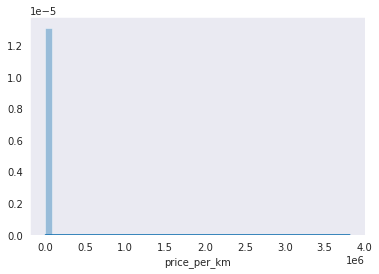

In [22]:
sns.distplot(df['price_per_km'])

In [24]:
df[df['fare_amount']==0.01]

,Unnamed: 0,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,date,month,week_nb,weekday,day_nb,hour,Month_day,distance_KM,working_days,drop_lat_qcut,drop_long_qcut,pick_lat_qcut,pick_long_qcut,dropoff_position_qcut,pickup_position_qcut,abs_diff_longitude,abs_diff_latitude,abs_diff_longitude_km,abs_diff_latitude_km,Euclidean,delta_manh_long,delta_manh_lat,manh_length,Euc_error,price_per_km_haversine,price_per_km_manh
372229,382959,2014-06-29 21:28:48.0000005,0.01,2014-06-29 21:28:48 UTC,-74.010325,40.725071,-74.046156,40.727257,1,2014-06-29 21:28:48+00:00,June,26,Sunday,180,21,29,3.029160,0,"(40.723, 40.729]","(-75.65100000000001, -74.007]","(40.72, 40.726]","(-75.935, -74.007]","(40.723, 40.729](-75.65100000000001, -74.007]","(40.72, 40.726](-75.935, -74.007]",3.583100e-02,2.186000e-03,2.883220,0.242744,2.893421,2.404271,1.609772,4.014043,38.730000,0.003301,0.002491
413059,425053,2014-03-31 19:12:15.0000002,0.01,2014-03-31 19:12:15 UTC,-74.015835,40.714954,-74.015836,40.714953,6,2014-03-31 19:12:15+00:00,March,14,Monday,90,19,31,0.000140,1,"(40.702, 40.716]","(-75.65100000000001, -74.007]","(40.709, 40.72]","(-75.935, -74.007]","(40.702, 40.716](-75.65100000000001, -74.007]","(40.709, 40.72](-75.935, -74.007]",1.000000e-06,1.000000e-06,0.000080,0.000111,0.000137,0.000017,0.000136,0.000153,11.345500,71.670819,65.490790
4633956,4767790,2014-03-31 03:24:08.0000001,0.01,2014-03-31 03:24:08 UTC,-73.994162,40.758329,-73.970324,40.845865,1,2014-03-31 03:24:08+00:00,March,14,Monday,90,3,31,9.938215,1,"(40.795, 41.858]","(-73.973, -73.969]","(40.756, 40.759]","(-73.995, -73.992]","(40.795, 41.858](-73.973, -73.969]","(40.756, 40.759](-73.995, -73.992]",2.383800e-02,8.753600e-02,1.918177,9.720412,9.907866,3.033502,9.432056,12.465558,25.814755,0.001006,0.000802
6810760,7007247,2014-06-29 21:28:29.0000002,0.01,2014-06-29 21:28:29 UTC,-73.958670,40.743635,-73.958670,40.743630,1,2014-06-29 21:28:29+00:00,June,26,Sunday,180,21,29,0.000556,0,"(40.74, 40.744]","(-73.959, -73.955]","(40.74, 40.744]","(-73.964, -73.958]","(40.74, 40.744](-73.959, -73.955]","(40.74, 40.744](-73.964, -73.958]",0.000000e+00,5.000000e-06,0.000000,0.000555,0.000555,0.000269,0.000486,0.000755,35.937260,17.986432,13.249318
7689804,7911626,2014-06-29 05:28:31.0000002,0.01,2014-06-29 05:28:31 UTC,-73.992880,40.753092,-73.982612,40.774192,1,2014-06-29 05:28:31+00:00,June,26,Sunday,180,5,29,2.500509,0,"(40.773, 40.777]","(-73.985, -73.982]","(40.75, 40.753]","(-73.995, -73.992]","(40.773, 40.777](-73.985, -73.982]","(40.75, 40.753](-73.995, -73.992]",1.026800e-02,2.110000e-02,0.826237,2.343044,2.484456,0.412930,2.449900,2.862831,15.229670,0.003999,0.003493


# MODELING

to test:
Clustering then regression
regression without clustering
Regression types to test : Linear regression, 

In [ ]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import MinMaxScaler

from sklearn.cluster import KMeans
from sklearn.cluster import MiniBatchKMeans
from yellowbrick.cluster import KElbowVisualizer # find an optimal number of  centroids for clustering
from sklearn.manifold import TSNE # for visualizaion of data with high number of dimension

In [ ]:
#model librairies
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LinearRegression

from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error

from sklearn.model_selection import RepeatedStratifiedKFold

#import statsmodels.api as sm
#from statsmodels.genmod.families.links import log



In [ ]:
# transform to dummies
#df=pd.get_dummies(data=df, columns=['hour','month','weekday'],drop_first=True)

In [ ]:
#Normalization of data with MinMaxscaler (not standardization since not sure the distribution is normal)
# define min max scaler
scaler = MinMaxScaler()
# transform data
scaled = scaler.fit_transform(df_ml2)

In [ ]:
# splitting  dataset into train and test 1
X_train, X_test,y_train,y_test = train_test_split(scaled, \
                                                  df.ride_duration_seconds, \
                                                  test_size=1/3, \
                                                  random_state=42)

In [ ]:
#usig a sample
df_ml3Sample=df_ml3.sample(frac=0.1)

In [ ]:
# 1LINEAR REGRESSION ()SKLEARN
linreg = LinearRegression()
linreg.fit(X_train,y_train)
y_pred1=linreg.predict(X_test)
R21=r2_score(y_test,y_pred1)
MSE1=mean_squared_error(y_test,y_pred1)
MAE1=mean_absolute_error(y_test,y_pred1)


In [ ]:
#TSNE
df_ml3Sample=pd.get_dummies(data=df_ml3Sample,columns=['month','weekday'],drop_first=True)
X_tsne=df_ml3Sample.drop(['cluster'],axis=1)
#Normalization of data with MinMaxscaler (not standardization since not sure the distribution is normal)
# define min max scaler
scaler4 = MinMaxScaler()
# transform data
X_tsne= scaler4.fit_transform(X_tsne)
tsne=TSNE(n_components=2,verbose=1,n_iter=1000)
tsne_results=tsne.fit_transform(X_tsne)
tsne_results.shape
df_ml3Sample['tsne2D1']=tsne_results[:,0]
df_ml3Sample['tsne2D2']=tsne_results[:,1]